# Import ingredients


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
import spacy
import en_core_web_sm
from nltk.stem import WordNetLemmatizer 
import nltk
from nltk.corpus import stopwords 
# Import stop word list
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import string 
#import soup in order to tokenise reviews.
from bs4 import BeautifulSoup as bs
import re
import string
import re
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from nltk.corpus import wordnet
from sklearn.svm import LinearSVC
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.utils.fixes import signature

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ameliafournillier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ameliafournillier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ameliafournillier/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Loading Data

In [2]:
df = pd.read_pickle('final_project/Data/Imdb_movie_reviews_database.pckl')

## Exploring the data - 1

In [3]:
df.shape

(50000, 2)

In [ ]:
df

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1
...,...,...
49995,I occasionally let my kids watch this garbage ...,0
49996,When all we have anymore is pretty much realit...,0
49997,The basic genre is a thriller intercut with an...,0
49998,Four things intrigued me as to this film - fir...,0


In [76]:
df.head(30)

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1
5,"This isn't the comedic Robin Williams, nor is ...",1
6,Yes its an art... to successfully make a slow ...,1
7,"In this ""critically acclaimed psychological th...",1
8,THE NIGHT LISTENER (2006) **1/2 Robin Williams...,1
9,"You know, Robin Williams, God bless him, is co...",1


In [4]:
# renamed column
df = df.rename(columns={'review':'reviews'})

In [5]:

df.columns

Index(['reviews', 'sentiment'], dtype='object')

In [79]:
# Check reviews to see if they correspond to sentiment.
df['sentiment'][0]

1

In [ ]:
df.isnull().sum

<bound method DataFrame.sum of        reviews  sentiment
0        False      False
1        False      False
2        False      False
3        False      False
4        False      False
...        ...        ...
49995    False      False
49996    False      False
49997    False      False
49998    False      False
49999    False      False

[50000 rows x 2 columns]>

In [80]:
pos_reviews = df[df['sentiment']==1]['reviews']
neg_reviews = df[df['sentiment']==0]['reviews']
print("First 10 samples of positive reviews\n".format(),pos_reviews[:10])
print("First 10 samples of negative reviews\n".format(),neg_reviews[:10])

First 10 samples of positive reviews
 0    Bromwell High is a cartoon comedy. It ran at t...
1    Homelessness (or Houselessness as George Carli...
2    Brilliant over-acting by Lesley Ann Warren. Be...
3    This is easily the most underrated film inn th...
4    This is not the typical Mel Brooks film. It wa...
5    This isn't the comedic Robin Williams, nor is ...
6    Yes its an art... to successfully make a slow ...
7    In this "critically acclaimed psychological th...
8    THE NIGHT LISTENER (2006) **1/2 Robin Williams...
9    You know, Robin Williams, God bless him, is co...
Name: reviews, dtype: object
First 10 samples of negative reviews
 12500    Story of a man who has unnatural feelings for ...
12501    Airport '77 starts as a brand new luxury 747 p...
12502    This film lacked something I couldn't put my f...
12503    Sorry everyone,,, I know this is supposed to b...
12504    When I was little my parents took me along to ...
12505    "It appears that many critics find the id

In [11]:
df = df.sample(frac=1,random_state=42).reset_index(drop=True)

In [12]:
print(df.shape)

(50000, 2)


In [13]:
df.head

<bound method NDFrame.head of                                                  reviews  sentiment
0      When I first saw the ad for this, I was like '...          1
1      "A Girl's Folly" is a sort of half-comedy, hal...          1
2      I started watching the show from the first sea...          1
3      This is a more interesting than usual porn mov...          1
4      I suppose for 1961 this film was supposed to b...          0
...                                                  ...        ...
49995  I saw this movie at midnight on On Demand the ...          1
49996  Some aspects of this production are good, such...          0
49997  I was not old enough to really appreciate the ...          0
49998  Nice movie with a great soundtrack which spans...          1
49999  Even though this was a made-for-TV production,...          0

[50000 rows x 2 columns]>

In [9]:
pos_reviews = df[df['sentiment']==1]['reviews']
neg_reviews = df[df['sentiment']==0]['reviews']
print("First 10 samples of positive reviews\n".format(),pos_reviews[:10])
print("First 10 samples of negative reviews\n".format(),neg_reviews[:10])

First 10 samples of positive reviews
 0     When I first saw the ad for this, I was like '...
1     "A Girl's Folly" is a sort of half-comedy, hal...
2     I started watching the show from the first sea...
3     This is a more interesting than usual porn mov...
6     I saw this movie when it was new. Later I rent...
8     First, what I didn't like. The acting was not ...
9     As spectacle, it's hard to fault Nihon chinbot...
12    It starts slowly, showing the dreary lives of ...
13    A year after losing gorgeous Jane Parker (Maur...
15    After "Attack of the Fifty Foot Woman" with Al...
Name: reviews, dtype: object
First 10 samples of negative reviews
 4     I suppose for 1961 this film was supposed to b...
5     This is a poor film. It certainly belongs in t...
7     This meandering tale of mob revenge is simply ...
10    4 Oscar winners, Karl Malden, Sally Field, Shi...
11    Horror films are a curious thing, sometimes th...
14    'Nobody knows anybody' is a conspiracy theory ...

In [ ]:
df['reviews'][0]

"When I first saw the ad for this, I was like 'Oh here we go. He's done High School Musical, but he can't coast along on that so now he's making appearances on other Disney shows'. Personally, I love The Suite Life and I'm a big fan of Ashely Tisdale. But for some reason, I'm not too keen on Zac Efron, although all my friends think he's the best thing since Jesse McCartney. But he really annoys me. Anyway, I watched the show (taking a break from English coursework) and was pleasantly surprised. The performances were good all round, especially from the regular characters on The Suite Life, and Zac Efron wasn't as bad as I had anticipated. All in all, a pretty good show."

# Natural Language Processing Pipeline 

Cleaning: 
* Tokenize the text (break text down into sentences, words, or other units). 
* Removing punctiation, whitespaces and other noise from sentence.
* Remove words that contain numbers.
* Removing stop words like “if,” “but,” “or,” and so on.
* Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database.
*   Normalizing/Lemmatizing  words by condensing all forms of a word to its root form (e.g. rooms -> room, slept -> sleep).

Feature Engineering:
*   Vectorizing text by turning the text into a numerical representation for consumption by your classifier.



### Cleaning

In [17]:
text = df['reviews'][1]


In [37]:
# removes html
text = bs(text).get_text() 
text

'"A Girl\'s Folly" is a sort of half-comedy, half-mockumentary look at the motion picture business of the mid-1910\'s. We get a glimpse of life at an early movie studio, where we experience assembly of a set, running through a scene, handling of adoring movie fanatics, even lunch at the commissary. We are also privy to little known cinematic facts - for example, did you know that "Frequently, \'movie\' actors do not know the plot of the picture in which they are working"?The plot of this film in essence is movie star Kenneth Driscoll\'s discovery and romancing of a budding young starlet whom he discovers while shooting on location in the country. I believe the 30-minute version I watched was abridged, included on the same tape with Cecil B. De Mille\'s "The Cheat." It is a very credible film - an easy watch with a large cast of extras. As a bonus it includes some of best-illustrated captions I have ever seen accompanying a silent movie.'

In [38]:
#make text lower case
lower_text = text.lower()
lower_text

'"a girl\'s folly" is a sort of half-comedy, half-mockumentary look at the motion picture business of the mid-1910\'s. we get a glimpse of life at an early movie studio, where we experience assembly of a set, running through a scene, handling of adoring movie fanatics, even lunch at the commissary. we are also privy to little known cinematic facts - for example, did you know that "frequently, \'movie\' actors do not know the plot of the picture in which they are working"?the plot of this film in essence is movie star kenneth driscoll\'s discovery and romancing of a budding young starlet whom he discovers while shooting on location in the country. i believe the 30-minute version i watched was abridged, included on the same tape with cecil b. de mille\'s "the cheat." it is a very credible film - an easy watch with a large cast of extras. as a bonus it includes some of best-illustrated captions i have ever seen accompanying a silent movie.'

In [39]:
# Storing the sets of punctuation in variable punct
punct = string.punctuation  
    
# Printing the punctuation values  
print(punct)    

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [41]:
# checking whether the characters from  punct are in review 
for i in lower_text:   
    if i in punct: 
        # Printing the punctuation values  
        print(f"Punctuation: {i}") 

Punctuation: "
Punctuation: '
Punctuation: "
Punctuation: -
Punctuation: ,
Punctuation: -
Punctuation: -
Punctuation: '
Punctuation: .
Punctuation: ,
Punctuation: ,
Punctuation: ,
Punctuation: ,
Punctuation: .
Punctuation: -
Punctuation: ,
Punctuation: "
Punctuation: ,
Punctuation: '
Punctuation: '
Punctuation: "
Punctuation: ?
Punctuation: '
Punctuation: .
Punctuation: -
Punctuation: ,
Punctuation: .
Punctuation: '
Punctuation: "
Punctuation: .
Punctuation: "
Punctuation: -
Punctuation: .
Punctuation: -
Punctuation: .


In [47]:
 # split by just words
text_split = re.split(r'\W+',lower_text)
text_join = " ".join(text_split)
text_join

' a girl s folly is a sort of half comedy half mockumentary look at the motion picture business of the mid 1910 s we get a glimpse of life at an early movie studio where we experience assembly of a set running through a scene handling of adoring movie fanatics even lunch at the commissary we are also privy to little known cinematic facts for example did you know that frequently movie actors do not know the plot of the picture in which they are working the plot of this film in essence is movie star kenneth driscoll s discovery and romancing of a budding young starlet whom he discovers while shooting on location in the country i believe the 30 minute version i watched was abridged included on the same tape with cecil b de mille s the cheat it is a very credible film an easy watch with a large cast of extras as a bonus it includes some of best illustrated captions i have ever seen accompanying a silent movie '

In [50]:
# Use regex to do a find-and-replace
letters_only = re.sub("[^a-zA-Z]"," ",text_join )
letters_only

' a girl s folly is a sort of half comedy half mockumentary look at the motion picture business of the mid      s we get a glimpse of life at an early movie studio where we experience assembly of a set running through a scene handling of adoring movie fanatics even lunch at the commissary we are also privy to little known cinematic facts for example did you know that frequently movie actors do not know the plot of the picture in which they are working the plot of this film in essence is movie star kenneth driscoll s discovery and romancing of a budding young starlet whom he discovers while shooting on location in the country i believe the    minute version i watched was abridged included on the same tape with cecil b de mille s the cheat it is a very credible film an easy watch with a large cast of extras as a bonus it includes some of best illustrated captions i have ever seen accompanying a silent movie '

In [ ]:
# Convert to lower case
#lower_case = letters_only.lower()        
#lower_case

### Tokenising Sentences

In [51]:
#split into list of words
words = letters_only.split() 
words

['a',
 'girl',
 's',
 'folly',
 'is',
 'a',
 'sort',
 'of',
 'half',
 'comedy',
 'half',
 'mockumentary',
 'look',
 'at',
 'the',
 'motion',
 'picture',
 'business',
 'of',
 'the',
 'mid',
 's',
 'we',
 'get',
 'a',
 'glimpse',
 'of',
 'life',
 'at',
 'an',
 'early',
 'movie',
 'studio',
 'where',
 'we',
 'experience',
 'assembly',
 'of',
 'a',
 'set',
 'running',
 'through',
 'a',
 'scene',
 'handling',
 'of',
 'adoring',
 'movie',
 'fanatics',
 'even',
 'lunch',
 'at',
 'the',
 'commissary',
 'we',
 'are',
 'also',
 'privy',
 'to',
 'little',
 'known',
 'cinematic',
 'facts',
 'for',
 'example',
 'did',
 'you',
 'know',
 'that',
 'frequently',
 'movie',
 'actors',
 'do',
 'not',
 'know',
 'the',
 'plot',
 'of',
 'the',
 'picture',
 'in',
 'which',
 'they',
 'are',
 'working',
 'the',
 'plot',
 'of',
 'this',
 'film',
 'in',
 'essence',
 'is',
 'movie',
 'star',
 'kenneth',
 'driscoll',
 's',
 'discovery',
 'and',
 'romancing',
 'of',
 'a',
 'budding',
 'young',
 'starlet',
 'whom',
 

### Remove Stop Words

In [55]:
stop = stopwords.words("english")

In [56]:
# Remove stop words from "words"
meaningful_words = []
for word in words:
   if word not in stop:
      meaningful_words.append(word)

print(meaningful_words)

['girl', 'folly', 'sort', 'half', 'comedy', 'half', 'mockumentary', 'look', 'motion', 'picture', 'business', 'mid', 'get', 'glimpse', 'life', 'early', 'movie', 'studio', 'experience', 'assembly', 'set', 'running', 'scene', 'handling', 'adoring', 'movie', 'fanatics', 'even', 'lunch', 'commissary', 'also', 'privy', 'little', 'known', 'cinematic', 'facts', 'example', 'know', 'frequently', 'movie', 'actors', 'know', 'plot', 'picture', 'working', 'plot', 'film', 'essence', 'movie', 'star', 'kenneth', 'driscoll', 'discovery', 'romancing', 'budding', 'young', 'starlet', 'discovers', 'shooting', 'location', 'country', 'believe', 'minute', 'version', 'watched', 'abridged', 'included', 'tape', 'cecil', 'b', 'de', 'mille', 'cheat', 'credible', 'film', 'easy', 'watch', 'large', 'cast', 'extras', 'bonus', 'includes', 'best', 'illustrated', 'captions', 'ever', 'seen', 'accompanying', 'silent', 'movie']


### Normalisation - Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer() 
for word in meaningful_words:
  print(f"word: {word}, lemma: {lemmatizer.lemmatize(word)}") 


word: bromwell, lemma: bromwell
word: high, lemma: high
word: cartoon, lemma: cartoon
word: comedy, lemma: comedy
word: ran, lemma: ran
word: time, lemma: time
word: programs, lemma: program
word: school, lemma: school
word: life, lemma: life
word: teachers, lemma: teacher
word: years, lemma: year
word: teaching, lemma: teaching
word: profession, lemma: profession
word: lead, lemma: lead
word: believe, lemma: believe
word: bromwell, lemma: bromwell
word: high, lemma: high
word: satire, lemma: satire
word: much, lemma: much
word: closer, lemma: closer
word: reality, lemma: reality
word: teachers, lemma: teacher
word: scramble, lemma: scramble
word: survive, lemma: survive
word: financially, lemma: financially
word: insightful, lemma: insightful
word: students, lemma: student
word: see, lemma: see
word: right, lemma: right
word: pathetic, lemma: pathetic
word: teachers, lemma: teacher
word: pomp, lemma: pomp
word: pettiness, lemma: pettiness
word: whole, lemma: whole
word: situation, lem

**To be able to replicate this for all reviews I have defined a function below:**

In [15]:
# return the wordnet object value corresponding to the POS tag

def get_wordnet_pos(pos_tag):

    '''
    Function to return the corresponding wordnet object value of the 
    'Part Of Speach tag' i.e "thing : NN" corresponds to Noun in wordnet.
    Input: string (pos tag)
    Output: string (a wordnet object)
    '''

    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def tokenised_reviews(review):
  
    '''
    Function to convert a review to a tokenised string of words.
    Input: string (a raw movie review)
    Output: string (a preprocessed movie review)
    '''
    
    # 1. Remove HTML
    review = bs(review).get_text() 

    # 2. Remove non-letters        
    review = re.sub("[^a-zA-Z]", " ", review)  

    # 3. split by just words
    review = re.split(r'\W+',review)
    review = " ".join(review)

    # 4. Convert to lower case
    review = review.lower()

    # 5. split into individual words 
    review = review.split()                              
    
    # 6. Import stop words
    stop = (stopwords.words("english"))                  
    
    # 7. Remove stop words  
    review = [t for t in review if t not in stop]

    # 8. remove empty tokens
    review = [t for t in review if len(t) > 0]

    # 9. pos tag text
    pos_tags = pos_tag(review)

    # 10. lemmatize text
    review = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]

    # 12. remove words with only one letter
    review = [t for t in review if len(t) > 1]

    # 13. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( review ))  

In [62]:
tokenised_reviews( df["reviews"][1] )

'girl folly sort half comedy half mockumentary look motion picture business mid get glimpse life early movie studio experience assembly set run scene handle adore movie fanatic even lunch commissary also privy little know cinematic fact example know frequently movie actor know plot picture work plot film essence movie star kenneth driscoll discovery romance bud young starlet discovers shoot location country believe minute version watch abridge included tape cecil de mille cheat credible film easy watch large cast extra bonus include best illustrated caption ever see accompany silent movie'

In [16]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
#for word in meaningful_words:
  #print(word.lemma_)

## Vectorisation Feature Engineering

In [18]:
#create bag of words
tfidf = TfidfVectorizer(tokenizer = tokenised_reviews)
classifier = LinearSVC()

In [19]:
X = df['reviews']
y = df['sentiment']

In [20]:
#Train data is data from the past, Test data is unseen data from the future
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
X_train.shape, X_test.shape

((40000,), (10000,))

In [22]:
y_train.shape, y_test.shape

((40000,), (10000,))

In [23]:
X_train

39087    Perhaps not the absolute greatest entry in the...
30893    Rozema's 1999 adaptation of Mansfield Park is ...
45278    What starts out as an interesting story quickl...
16398    This movie should have ended as soon as the jo...
13653    Obviously made on the cheap to capitalize on t...
                               ...                        
11284    I love old Burt Reynolds movies. They're funni...
44732    For all losers who gave it negative review,its...
38158    When I bought this film, I expected to get a f...
860      On first viewing this movie seems to be some k...
15795    This movie includes one of the best characters...
Name: reviews, Length: 40000, dtype: object

In [24]:
#First will do a vectorisation then a classification
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [25]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenised_reviews at 0x7f19b745fc80>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=

In [26]:
y_pred = clf.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      4976
           1       0.63      0.63      0.63      5024

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



In [28]:
print(accuracy_score(y_test, y_pred))

0.6271


In [29]:
confusion_matrix(y_test, y_pred)


array([[3095, 1881],
       [1848, 3176]])

Text(0.5, 1.0, 'Confusion Matrix \n Random Forest')

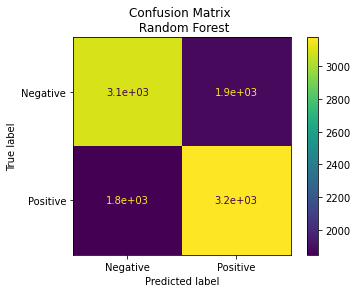

In [33]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                     display_labels= ["Negative", 'Positive'])

disp.ax_.set_title("Confusion Matrix \n LinearSVC")

In [40]:
# PR curve

In [41]:
try:
    from inspect import signature
except ImportError:
    from sklearn.externals.funcsigs import signature

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.58')

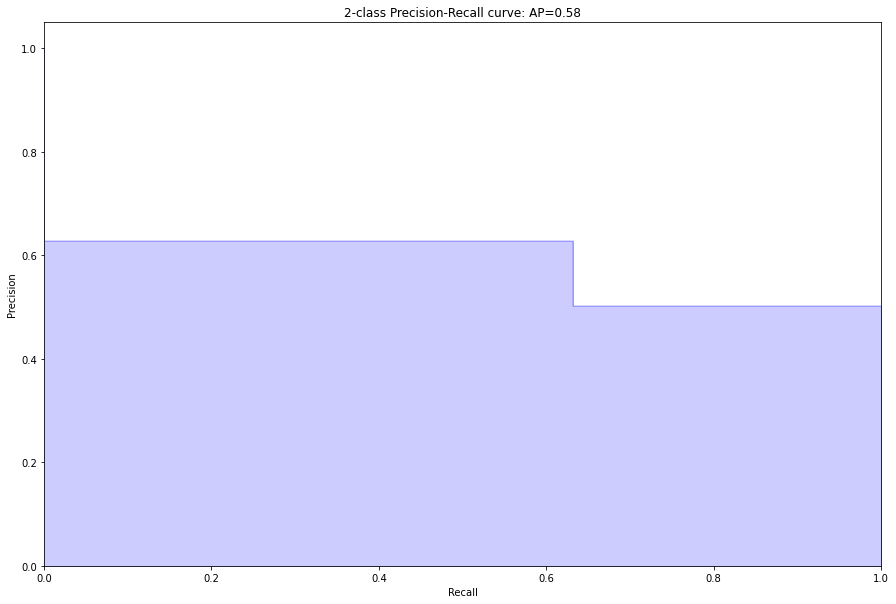

In [42]:
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [58]:
cls_lst = [KNeighborsClassifier(),
          SVC(),
          GaussianProcessClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          GaussianNB(),
          QuadraticDiscriminantAnalysis()
           ]


def evaluate(df, cls):
    accuracies = {}
    
    for cl in cls:
        tfidf = TfidfVectorizer(tokenizer = tokenised_reviews)
        classifier = cl
        clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])
        X = clf.fit(df.drop('sentiment', axis=1))
        y = df['sentiment']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

        
        cl.fit(X_train, y_train)
        pred = cl.predict(X_test)
        # print(classification_report(y_test, pred))
        accuracies[cl.__class__.__name__] = accuracy_score(y_test, pred)
        #print(accuracy_score(y_test, pred))
    return accuracies




In [59]:
accuracy_dict = evaluate(df, cls_lst)
accuracy_df = pd.DataFrame(accuracy_dict, index=[0])

ValueError: ignored

In [60]:
#First will do a vectorisation then a classification
clf1 = Pipeline([('tfidf', tfidf), ('clf', RandomForestClassifier())])

In [61]:
clf1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [64]:
y_pred1 = clf1.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      4976
           1       0.63      0.63      0.63      5024

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000

